<a href="https://colab.research.google.com/github/Rathod-shubhamm/boilerplate-page-view-time-series-visualizer/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/datasets/medical_examination.csv")
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [10]:
df["overweight"] = (df["weight"] / (df["height"] / 100) **2).astype(int)
print(df["overweight"])

0        21
1        34
2        23
3        28
4        23
         ..
69995    26
69996    50
69997    31
69998    27
69999    24
Name: overweight, Length: 70000, dtype: int64


In [13]:
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
df["gluc"] = (df["gluc"] > 1).astype(int)
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

In [50]:
def draw_cat_plot():
   df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ["active" , 'alco' , 'smoke' ,'gluc' , 'active', 'overweight' ])
   df_cat = df_cat.groupby(["cardio" , 'variable' , 'value']).size().reset_index(name = "total")

   graph = sns.catplot(data = df_cat,
                    kind = "bar" ,
                    x = "variable",
                    y = "total",
                    hue = 'value',
                    col ='cardio')
   fig = graph.fig
   plt.show()

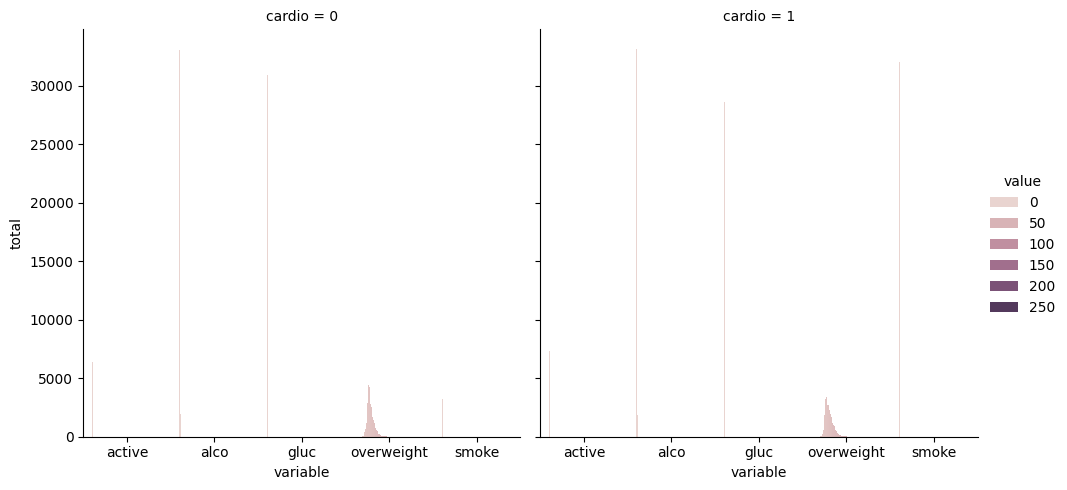